In [ ]:
# import all packages

import pandas as pd
import numpy as np
from datetime import timedelta, datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#import xgboost as xgb

import plotly.graph_objects as go

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# import packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, SimpleRNN, Input, ConvLSTM2D, Conv2D, LSTM,Flatten,Reshape, concatenate, Conv3D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping as ES
from sklearn.preprocessing import MinMaxScaler
from tsaug.visualization import plot as PLOT
from tqdm import tqdm

In [ ]:
df = pd.read_excel("D:\\hassan sharifi\\milad's project\\aege\\nawell data preprosecing\\data_new.xlsx")
df

,datetime,BHP(kg/cm2),OR(m3/day),CO(m3),CG(m3),GR(m3/day),WR(m3/day)
0,2014-06-01,279.35,2077.00,2077.00,2.356428e+05,235642.78,0.00
1,2014-06-02,276.65,2077.00,4154.00,4.712856e+05,235642.78,0.00
2,2014-06-03,275.20,2077.00,6231.00,7.069283e+05,235642.75,0.00
3,2014-06-04,274.15,2077.00,8308.00,9.425711e+05,235642.81,0.00
4,2014-06-05,273.30,2077.00,10385.00,1.178214e+06,235642.75,0.00
...,...,...,...,...,...,...,...
2247,2020-07-26,224.93,298.38,1849836.13,2.068786e+08,34896.00,55.66
2248,2020-07-27,224.80,298.25,1850134.38,2.069135e+08,34880.00,55.76
2249,2020-07-28,224.68,298.13,1850432.50,2.069484e+08,34864.00,55.85
2250,2020-07-29,224.56,298.13,1850730.63,2.069832e+08,34848.00,55.95


In [ ]:
date_time = pd.to_datetime(df.pop('datetime'), format='%d.%m.%Y')
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day'] = np.log10(timestamp_s * (2 * np.pi / day))
df['Year'] = np.log10(timestamp_s * (2 * np.pi / year))
df

,BHP(kg/cm2),OR(m3/day),CO(m3),CG(m3),GR(m3/day),WR(m3/day),Day,Year
0,279.35,2077.00,2077.00,2.356428e+05,235642.78,0.00,5.008279,2.445698
1,276.65,2077.00,4154.00,4.712856e+05,235642.78,0.00,5.008306,2.445725
2,275.20,2077.00,6231.00,7.069283e+05,235642.75,0.00,5.008333,2.445751
3,274.15,2077.00,8308.00,9.425711e+05,235642.81,0.00,5.008360,2.445778
4,273.30,2077.00,10385.00,1.178214e+06,235642.75,0.00,5.008386,2.445805
...,...,...,...,...,...,...,...,...
2247,224.93,298.38,1849836.13,2.068786e+08,34896.00,55.66,5.064619,2.502038
2248,224.80,298.25,1850134.38,2.069135e+08,34880.00,55.76,5.064642,2.502061
2249,224.68,298.13,1850432.50,2.069484e+08,34864.00,55.85,5.064666,2.502085
2250,224.56,298.13,1850730.63,2.069832e+08,34848.00,55.95,5.064689,2.502108


      BHP(kg/cm2)  OR(m3/day)    CO(m3)    CG(m3)  GR(m3/day)  WR(m3/day)  \
0        3.173398    1.804677 -2.308254 -2.325105    1.823915   -1.094874   
1        3.049717    1.804677 -2.302538 -2.319288    1.823915   -1.094874   
2        2.983296    1.804677 -2.296822 -2.313471    1.823914   -1.094874   
3        2.935198    1.804677 -2.291105 -2.307654    1.823915   -1.094874   
4        2.896261    1.804677 -2.285389 -2.301837    1.823914   -1.094874   
...           ...         ...       ...       ...         ...         ...   
1571    -0.704682   -0.208145  0.996668  0.990969   -0.221702   -0.028208   
1572    -0.706056   -0.208145  0.998356  0.992630   -0.222091   -0.025712   
1573    -0.706972   -0.208489  1.000044  0.994291   -0.222285   -0.022661   
1574    -0.708347   -0.208489  1.001732  0.995951   -0.222480   -0.020165   
1575    -0.709263   -0.208489  1.003419  0.997610   -0.222674   -0.017669   

           Day      Year  
0    -1.757533 -1.757533  
1    -1.755230 -1.755

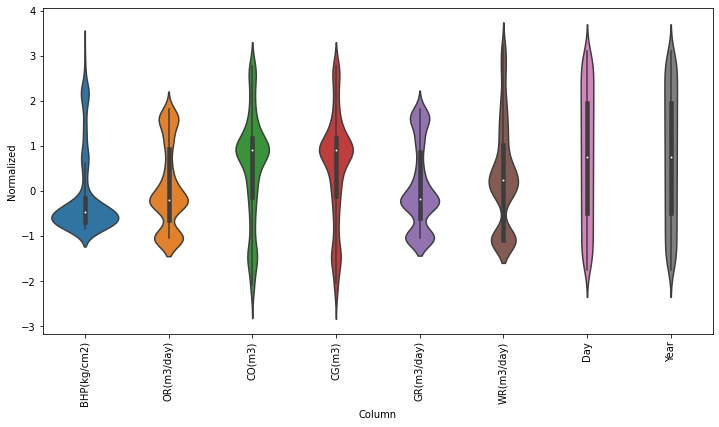

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
#val_df = df[int(n*0.7):int(n*0.9)]
#test_df = df[int(n*0.9):]
test_df = df[int(n*0.7):]
num_features = df.shape[1]

train_mean = train_df.mean()
train_std = train_df.std()

Train_df = (train_df - train_mean) / train_std
#Val_df = (val_df - train_mean) / train_std
Test_df = (test_df - train_mean) / train_std

print(Train_df)

df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

## make a new type of img data from numeric data

In [ ]:
train_step = 100
test_step = 100
OR_tr = []
OR_ts = []
BHP_tr = []
BHP_ts = []
for i in Train_df.columns[0:2]:
    trainX,trainY =convertToDataset(Train_df[i].values,train_step)
    testX,testY =convertToDataset(Test_df[i].values,test_step)
    if i=='OR(m3/day)':
        OR_tr.extend([trainX,trainY])
        OR_ts.extend([testX,testY])
    else:
        BHP_tr.append(trainX)
        BHP_ts.append(testX)

print(trainX.shape)
print(testX.shape)
del trainX
del testX

trainY = OR_tr[1]
testY = OR_ts[1]

OR_tr = OR_tr[0]
OR_ts = OR_ts[0]

BHP_tr = BHP_tr[0]
BHP_ts = BHP_ts[0]
#trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], n_bit))
#testX = np.reshape(testX, (testX.shape[0],testX.shape[1], n_bit))

(1476, 100)
(576, 100)


One OR batch shape: (100,)
(100, 1)
(100, 32)


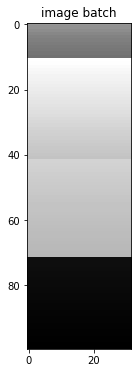

In [ ]:
# for example
print('One OR batch shape:',OR_tr[50].shape)
a = OR_tr[50].reshape(BHP_tr[50].shape[0],1)
a = a.reshape(a.shape[0],1)
print(a.shape)
for i in range(5):
    a = np.c_[a,a]
a.reshape(a.shape[0],a.shape[1],1)
print(a.shape)
plt.imshow(a,'gray');
plt.title('image batch');

In [ ]:
train_step = 10
test_step = 10
OR_tr = []
OR_ts = []
BHP_tr = []
BHP_ts = []
for i in Train_df.columns[0:2]:
    trainX,trainY =convertToDataset(Train_df[i].values,train_step)
    testX,testY =convertToDataset(Test_df[i].values,test_step)
    if i=='OR(m3/day)':
        OR_tr.extend([trainX,trainY])
        OR_ts.extend([testX,testY])
    else:
        BHP_tr.append(trainX)
        BHP_ts.append(testX)

print(trainX.shape)
print(testX.shape)
del trainX
del testX

trainY = OR_tr[1]
testY = OR_ts[1]

OR_tr = OR_tr[0]
OR_ts = OR_ts[0]

BHP_tr = BHP_tr[0]
BHP_ts = BHP_ts[0]
#trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], n_bit))
#testX = np.reshape(testX, (testX.shape[0],testX.shape[1], n_bit))

(1566, 10)
(666, 10)


**Converting every batch in train/test set from numeric batch to image batch**

Shape of train set: (1566, 10, 32, 1)


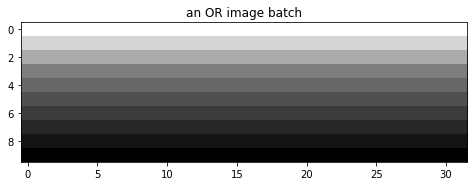

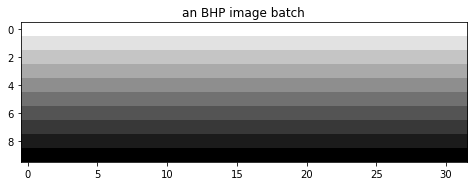

In [ ]:
# Train Set
width_of_img = 5

# OR
or_ = []
for i in OR_tr:
    a = i.reshape(i.shape[0],1)
    for i in range(width_of_img):
        a = np.c_[a,a]
    a.reshape(a.shape[0],a.shape[1],1)
    or_.append(a)
OR_tr = np.array(or_)
OR_tr = OR_tr.reshape(OR_tr.shape[0],OR_tr.shape[1],OR_tr.shape[2],1)
del or_
plt.figure()
plt.imshow(OR_tr[51],'gray');
plt.title('an OR image batch');

# BHP
bhp_ = []
for i in BHP_tr:
    a = i.reshape(i.shape[0],1)
    for i in range(width_of_img):
        a = np.c_[a,a]
    a.reshape(a.shape[0],a.shape[1],1)
    bhp_.append(a)
BHP_tr = np.array(bhp_)
BHP_tr = BHP_tr.reshape(BHP_tr.shape[0],BHP_tr.shape[1],BHP_tr.shape[2],1)
del bhp_
plt.figure()
plt.imshow(BHP_tr[51],'gray');
plt.title('an BHP image batch');

print('Shape of train set:', OR_tr.shape)

Shape of test set: (666, 10, 32, 1)


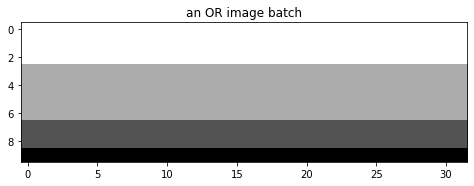

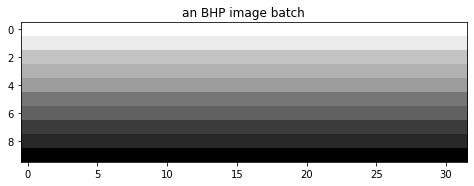

In [ ]:
# Test Set
width_of_img = 5

# OR
or_ = []
for i in OR_ts:
    a = i.reshape(i.shape[0],1)
    for i in range(width_of_img):
        a = np.c_[a,a]
    a.reshape(a.shape[0],a.shape[1],1)
    or_.append(a)
OR_ts = np.array(or_)
OR_ts = OR_ts.reshape(OR_ts.shape[0],OR_ts.shape[1],OR_ts.shape[2],1)
del or_
plt.figure()
plt.imshow(OR_ts[51],'gray');
plt.title('an OR image batch');

# BHP
bhp_ = []
for i in BHP_ts:
    a = i.reshape(i.shape[0],1)
    for i in range(width_of_img):
        a = np.c_[a,a]
    a.reshape(a.shape[0],a.shape[1],1)
    bhp_.append(a)
BHP_ts = np.array(bhp_)
BHP_ts = BHP_ts.reshape(BHP_ts.shape[0],BHP_ts.shape[1],BHP_ts.shape[2],1)
del bhp_
plt.figure()
plt.imshow(BHP_ts[51],'gray');
plt.title('an BHP image batch');

print('Shape of test set:', OR_ts.shape)

**creating univariate models**

In [ ]:
shape = OR_tr[0].shape
print(shape)

(10, 32, 1)


In [ ]:
# 1: simple 2D-CNN RNN
input_layer = Input(shape=shape)
conv1 = Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(input_layer)
rshp = Reshape((shape[0]*shape[1],64))(conv1)
rnn = SimpleRNN(units = 64, activation='tanh')(rshp)
dns = Dense(1)(rnn)
model = Model(input_layer,dns)

In [ ]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10, 32, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 32, 64)        640       
_________________________________________________________________
reshape_4 (Reshape)          (None, 320, 64)           0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(OR_tr,trainY, epochs=100, batch_size=16, verbose=1, validation_split=0.1,
                    callbacks = [ES(patience=10,monitor='val_loss',restore_best_weights=True)])

Epoch 1/100
89/89 [==============================] - 2s 27ms/step - loss: 0.0583 - val_loss: 0.0065
Epoch 2/100
89/89 [==============================] - 3s 28ms/step - loss: 0.0142 - val_loss: 0.0057
Epoch 3/100
89/89 [==============================] - 3s 28ms/step - loss: 0.0140 - val_loss: 0.0056
Epoch 4/100
89/89 [==============================] - 3s 29ms/step - loss: 0.0132 - val_loss: 0.0052
Epoch 5/100
89/89 [==============================] - 3s 28ms/step - loss: 0.0127 - val_loss: 0.0051
Epoch 6/100
89/89 [==============================] - 3s 29ms/step - loss: 0.0126 - val_loss: 0.0054
Epoch 7/100
89/89 [==============================] - 3s 29ms/step - loss: 0.0129 - val_loss: 0.0052
Epoch 8/100
89/89 [==============================] - 2s 28ms/step - loss: 0.0123 - val_loss: 0.0228
Epoch 9/100
89/89 [==============================] - 3s 28ms/step - loss: 0.0125 - val_loss: 0.0058
Epoch 10/100
89/89 [==============================] - 3s 28ms/step - loss: 0.0125 - val_loss: 0.0050

Text(0, 0.5, 'loss')

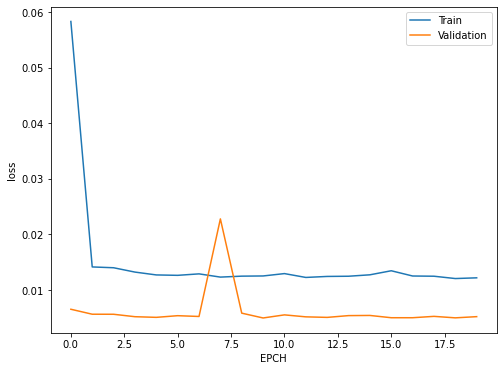

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss,label='Train')
plt.plot(val_loss,label='Validation')
plt.legend()
plt.xlabel('EPCH')
plt.ylabel('loss')

In [ ]:
trainPredict = model.predict(OR_tr)
testPredict= model.predict(OR_ts)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

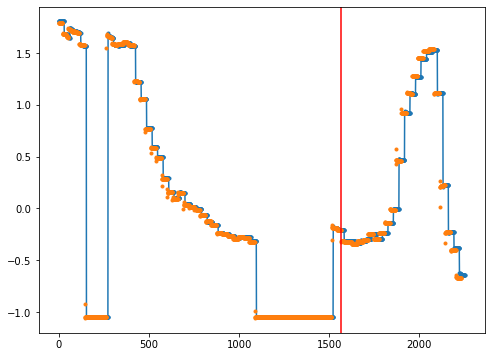

In [ ]:
X = np.r_[Train_df['OR(m3/day)'].values.reshape(-1,1),Test_df['OR(m3/day)'].values.reshape(-1,1)]
plt.plot(X,'.-')
plt.plot(predicted,'.')
plt.axvline(len(OR_tr), c="r")
plt.show()